In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D

In [2]:
data = pd.read_csv("all_templates_2.csv", header = None)
train_y = np.array(data[data.shape[1]-1])  # метки выборки
train_y = train_y.reshape(train_y.shape[0],1)
#train_y = train_y.T
data = data.drop([data.shape[1]-1], axis=1)
train_x = np.array(data)  # сама выборка

y = train_y
train_y = keras.utils.to_categorical(train_y) # категорирование
train_x = np.expand_dims(train_x, axis=2)

#test_x = pd.read_csv("template_1_test.csv", header=None)

In [3]:
n_features = train_x.shape[1]

In [12]:
model = keras.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_features,1)),
    #Dropout(0.3),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(125, activation='relu'),  #softsign
    Dense(2,  activation='softmax')
])

In [68]:
# вывод структуры НС в консоль
print(model.summary()) 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 120, 64)           256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 120, 64)           0         
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 60, 64)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 58, 64)            12352     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 29, 64)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1856)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 125)             

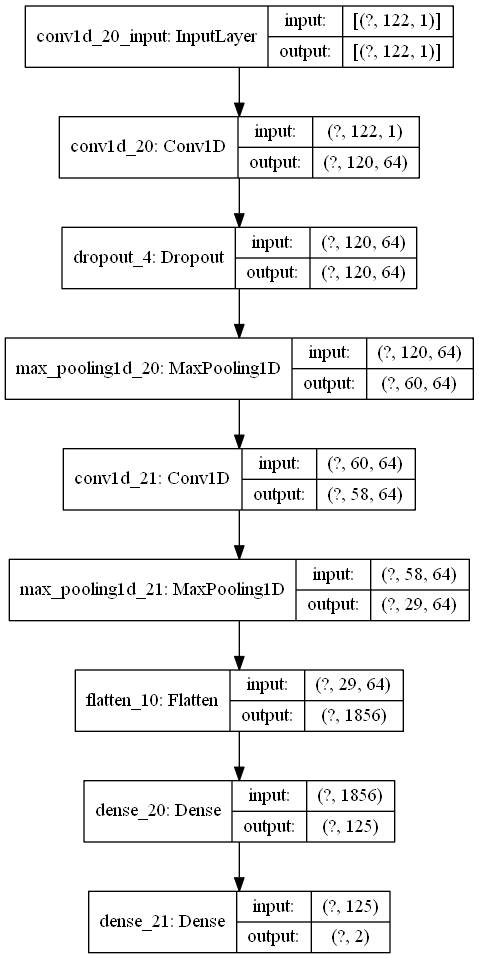

In [69]:
# начертить модель
keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [9]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [13]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=METRICS)

In [14]:
his = model.fit(train_x, train_y, batch_size=32, epochs=50, validation_split=0.35)

Train on 39 samples, validate on 22 samples
Epoch 1/50
39/39 [==============================] - 6s 163ms/sample - loss: 0.6404 - tp: 27.0000 - fp: 12.0000 - tn: 27.0000 - fn: 12.0000 - accuracy: 0.6923 - precision: 0.6923 - recall: 0.6923 - auc: 0.8024 - val_loss: 0.5298 - val_tp: 19.0000 - val_fp: 3.0000 - val_tn: 19.0000 - val_fn: 3.0000 - val_accuracy: 0.8636 - val_precision: 0.8636 - val_recall: 0.8636 - val_auc: 0.9669
Epoch 2/50
39/39 [==============================] - 0s 1ms/sample - loss: 0.5738 - tp: 31.0000 - fp: 8.0000 - tn: 31.0000 - fn: 8.0000 - accuracy: 0.7949 - precision: 0.7949 - recall: 0.7949 - auc: 0.8416 - val_loss: 0.4514 - val_tp: 18.0000 - val_fp: 4.0000 - val_tn: 18.0000 - val_fn: 4.0000 - val_accuracy: 0.8182 - val_precision: 0.8182 - val_recall: 0.8182 - val_auc: 0.9494
Epoch 3/50
39/39 [==============================] - 0s 1ms/sample - loss: 0.5776 - tp: 29.0000 - fp: 10.0000 - tn: 29.0000 - fn: 10.0000 - accuracy: 0.7436 - precision: 0.7436 - recall: 0.7436

39/39 [==============================] - 0s 2ms/sample - loss: 0.2352 - tp: 35.0000 - fp: 4.0000 - tn: 35.0000 - fn: 4.0000 - accuracy: 0.8974 - precision: 0.8974 - recall: 0.8974 - auc: 0.9809 - val_loss: 1.0373 - val_tp: 16.0000 - val_fp: 6.0000 - val_tn: 16.0000 - val_fn: 6.0000 - val_accuracy: 0.7273 - val_precision: 0.7273 - val_recall: 0.7273 - val_auc: 0.6405
Epoch 23/50
39/39 [==============================] - 0s 1ms/sample - loss: 0.2434 - tp: 35.0000 - fp: 4.0000 - tn: 35.0000 - fn: 4.0000 - accuracy: 0.8974 - precision: 0.8974 - recall: 0.8974 - auc: 0.9691 - val_loss: 0.9534 - val_tp: 17.0000 - val_fp: 5.0000 - val_tn: 17.0000 - val_fn: 5.0000 - val_accuracy: 0.7727 - val_precision: 0.7727 - val_recall: 0.7727 - val_auc: 0.7293
Epoch 24/50
39/39 [==============================] - 0s 1ms/sample - loss: 0.2621 - tp: 35.0000 - fp: 4.0000 - tn: 35.0000 - fn: 4.0000 - accuracy: 0.8974 - precision: 0.8974 - recall: 0.8974 - auc: 0.9560 - val_loss: 0.9542 - val_tp: 17.0000 - val_f

Epoch 44/50
39/39 [==============================] - 0s 2ms/sample - loss: 0.1334 - tp: 36.0000 - fp: 3.0000 - tn: 36.0000 - fn: 3.0000 - accuracy: 0.9231 - precision: 0.9231 - recall: 0.9231 - auc: 0.9915 - val_loss: 1.4360 - val_tp: 17.0000 - val_fp: 5.0000 - val_tn: 17.0000 - val_fn: 5.0000 - val_accuracy: 0.7727 - val_precision: 0.7727 - val_recall: 0.7727 - val_auc: 0.6281
Epoch 45/50
39/39 [==============================] - 0s 2ms/sample - loss: 0.1176 - tp: 38.0000 - fp: 1.0000 - tn: 38.0000 - fn: 1.0000 - accuracy: 0.9744 - precision: 0.9744 - recall: 0.9744 - auc: 0.9941 - val_loss: 1.5600 - val_tp: 16.0000 - val_fp: 6.0000 - val_tn: 16.0000 - val_fn: 6.0000 - val_accuracy: 0.7273 - val_precision: 0.7273 - val_recall: 0.7273 - val_auc: 0.5868
Epoch 46/50
39/39 [==============================] - 0s 2ms/sample - loss: 0.1469 - tp: 36.0000 - fp: 3.0000 - tn: 36.0000 - fn: 3.0000 - accuracy: 0.9231 - precision: 0.9231 - recall: 0.9231 - auc: 0.9901 - val_loss: 1.5980 - val_tp: 16.

In [20]:
def pred(y_p):
    y_pred = []

    for i in range(len(y_p)):
        if y_p[i][0] < y_p[i][1]:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_prob = model.predict_proba(train_x)
y_pr = pred(y_prob)

fpr, tpr, thresholds = roc_curve(y, y_pr)
auc_keras = auc(fpr, tpr)

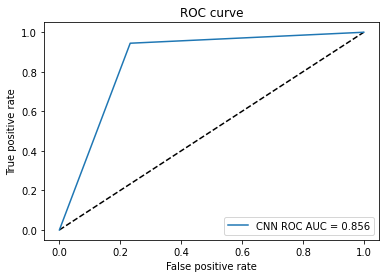

In [41]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='CNN ROC AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

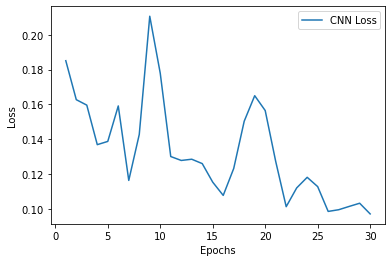

In [12]:
import csv

loss_values = his.history['loss']
epochs = range(1, len(loss_values)+1)

with open('CNN_loss.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerow(loss_values)

plt.plot(epochs, loss_values, label='CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
epochs

range(1, 28)

In [46]:
test_x = pd.read_csv("test_templates00110.csv", header=None)
#test_x = pd.read_csv("template_1_test.csv", header=None)
test_x = np.array(test_x)
test_x = np.expand_dims(test_x, axis=2)

test_y = [0,0,1,1,0]
test_y = np.array(test_y)
test_y = keras.utils.to_categorical(test_y,2)
#test_y = test_y.reshape(test_y.shape[0],1)

In [47]:
model.evaluate(test_x, test_y)

5/5 [==============================] - 0s 3ms/sample - loss: 0.0516 - tp: 5.0000 - fp: 0.0000e+00 - tn: 5.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000


[0.05156433582305908, 5.0, 0.0, 5.0, 0.0, 1.0, 1.0, 1.0, 1.0]

In [29]:
y_test = model.predict_proba(test_x)
y_test = pred(y_test)
y_test

[0, 0, 1, 1, 0]

In [23]:
import csv

with open('CNN_pred.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerow(y_pr)

# model.save('path_to_my_model.h5')
del model
# Восстановить в точности ту же модель исключительно из файла:
model = keras.models.load_model('path_to_my_model.h5')